In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.datasets import make_classification
from collections import Counter

In [2]:
#generating dataset
X,Y = make_classification(n_samples=1000, n_features=5, n_classes=2, weights=[0.01,0.99],random_state=10)

In [3]:
X,Y

(array([[-0.21690252,  1.18062213,  0.53122209,  0.93964631, -1.5915878 ],
        [ 1.0376882 ,  0.56324374, -0.23199673, -2.1345211 ,  1.32216686],
        [-0.07022986,  1.75140262,  0.68104719,  0.82462452, -2.16612924],
        ...,
        [ 1.14583033,  0.07491547, -0.45955899, -2.56488297, -1.42292864],
        [ 0.32140465,  1.54311109,  0.43701098, -0.14092903,  1.33498833],
        [-0.43263896,  0.44790352,  0.35056658,  1.14943062,  0.0304722 ]]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 

In [4]:
Counter(Y)

Counter({np.int64(1): 983, np.int64(0): 17})

<Axes: xlabel='0', ylabel='1'>

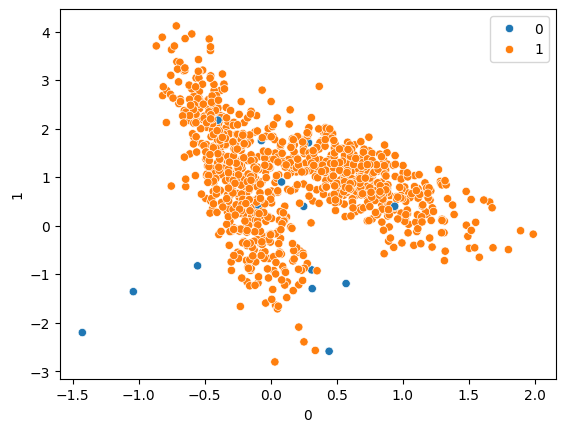

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=Y)

In [6]:
#train test split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [7]:
class_weights = {0:58,1:1}
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
cv = StratifiedKFold()
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight = class_weights)

In [ ]:
grid = GridSearchCV(estimator=model,param_grid=params,cv = cv,scoring='accuracy')